<a href="https://colab.research.google.com/github/Ru1chi/Feynn_Labs/blob/main/Task_Session_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### `Q-1:` Using Gapminder Data
1. Create a scatter plot of 'gdpPercap' against 'lifeExp' for the year 2007, with the size of the markers determined by 'pop' and the color determined by 'continent'.

In [2]:
import plotly.express as px
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [6]:
temp_df=df[df['year']==2007]

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

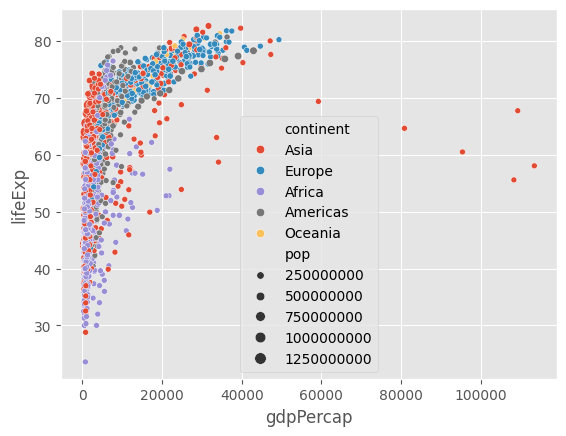

In [8]:
sns.scatterplot(data=df,x='gdpPercap',y='lifeExp',size='pop',hue='continent')

### `Q-2-3:` Using `flights` dataset of seaborn.

2. Using the "flights" dataset that comes with seaborn, create a heatmap that shows the average number of passengers per month for each year.

3. Using the seaborn's flight dataset, create a clustermap to visualize the relationship between the number of passengers, months, and year.


In [10]:
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [19]:
aa=df.pivot_table(values='passengers',index='year',columns='month')

<ipython-input-19-2d8503b177b5>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  aa=df.pivot_table(values='passengers',index='year',columns='month')


<Axes: xlabel='month', ylabel='year'>

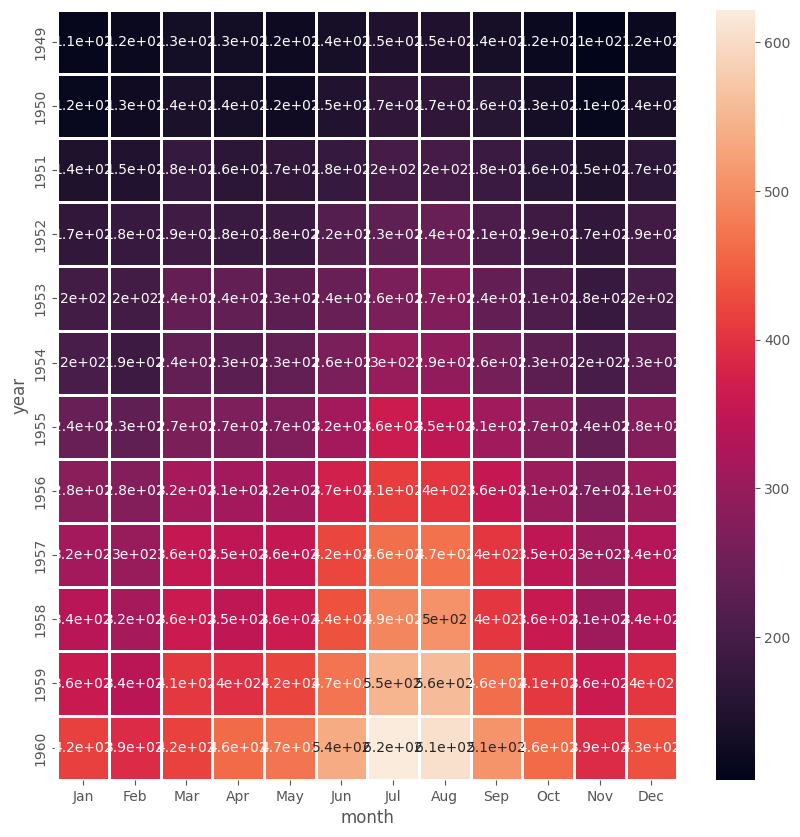

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(aa,annot=True,linewidth=2)

## For questions 4-8:

For these qestions, an insurance dataset is used. You can get details from [here](https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health). And if you want this dataset to use directly, then you can use this link: **https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv**

### **`Q-4:`** Draw a scatter plot based on the below conditions:
1. x-axis should be "age" and y-axis should be "bmi".
2. For hue, size and style parameters use "diabetic", "gender" and "smoker" column respectively.
3. Add title to your chart.
4. Age should be less than 70 percentiles.
5. BMI should be greater than the average value of the filtered age dataset.

In [82]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [40]:
#age less the 70 percentile
age=df['age'].quantile(0.7)
age_filter=df[df['age']<age]
age_filter

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,1335,43.0,male,32.8,125,No,0,Yes,southwest,52590.83
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [41]:
#avg values of filtered age data
avg_bmi=age_filter['bmi'].mean()
avg_bmi

30.770065789473684

In [43]:
final_df=age_filter[age_filter['bmi']>avg_bmi]
final_df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
16,16,17,35.0,male,34.1,90,No,0,No,southwest,1261.44
17,17,18,41.0,male,34.4,84,No,0,No,southwest,1261.86
...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,1334,44.0,male,36.4,127,No,1,Yes,southwest,51194.56
1334,1334,1335,43.0,male,32.8,125,No,0,Yes,southwest,52590.83
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40


Text(0.5, 1.0, 'age bmi analysis')

<Figure size 1200x1200 with 0 Axes>

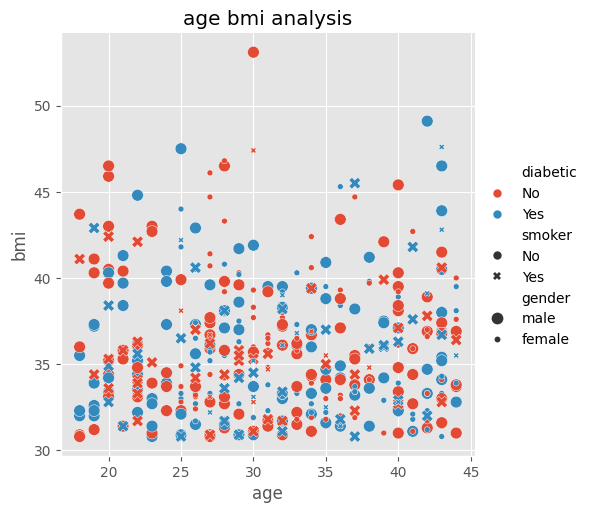

In [44]:
plt.figure(figsize=(12,12))
sns.relplot(data=final_df,x='age',y='bmi',kind='scatter',hue='diabetic',size='gender',style='smoker')
plt.title('age bmi analysis')

### **`Q-5:`** Draw a line plot by using the below informations

1. bloodpressure vs children
2. Blood-pressure values should be between 90 and 100. The upper and lower limit are included.
3. Show the details of "smoker".

In [ ]:
#df[(df['bloodpressure']>=90) & (df['bloodpressure']<=100)]
filtered_df=df[(df["bloodpressure"] >= 90) & (df["bloodpressure"] <= 100)]
filtered_df


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1305,1305,1306,57.0,female,46.2,96,No,0,Yes,southeast,45863.21
1310,1310,1311,26.0,female,37.1,95,No,3,Yes,northeast,46255.11
1314,1314,1315,22.0,male,33.9,97,No,0,Yes,southeast,46889.26
1319,1319,1320,40.0,male,36.3,94,Yes,1,Yes,southwest,47403.88


<Axes: xlabel='bloodpressure', ylabel='children'>

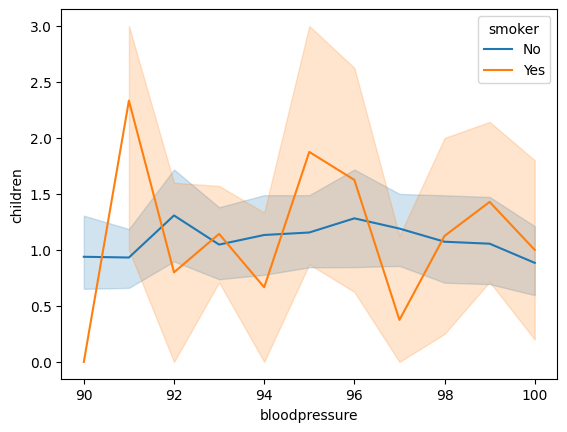

In [ ]:
sns.lineplot(data=filtered_df,x='bloodpressure',y='children',hue='smoker')

### **`Q-6:`** Draw a histogram using displot

- based on "age" column.
- Show details of "smoker" (hue).
- Create 2 separate charts for the above 2 conditions based on "gender" side-by-side.

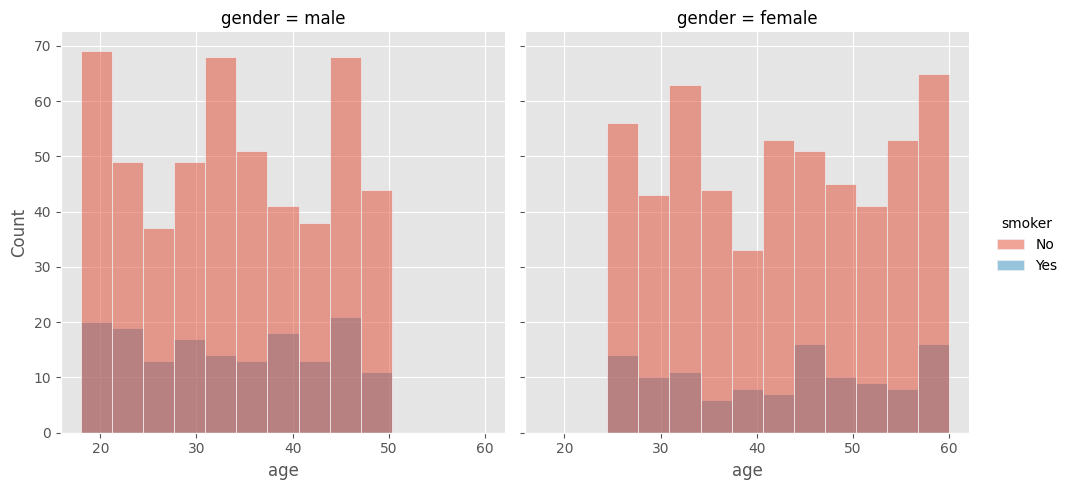

In [67]:
sns.displot(data=df,kind='hist',x='age',hue='smoker',col='gender')

### **`Q-7:`** Draw a kde plot between "age" and "bloodpressure".

> Add blockquote



In [73]:
df["age"] += np.random.normal(0, 0.5, size=len(df))
df["bloodpressure"] += np.random.normal(0, 0.5, size=len(df))

<Axes: xlabel='age', ylabel='bloodpressure'>

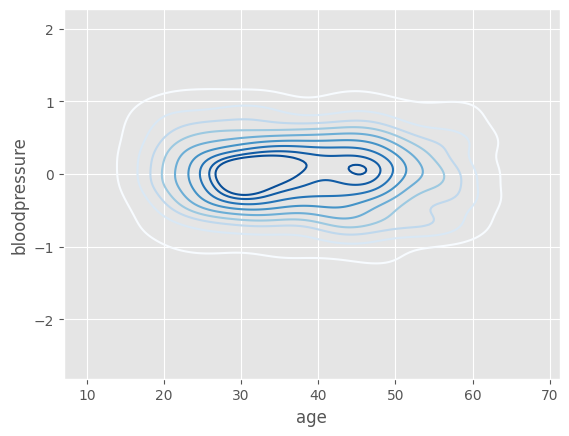

In [74]:
sns.kdeplot(data=df,x='age',y='bloodpressure',cmap='Blues')


### **`Q-8:`** Draw a clustermap between between "age", "bmi" and "bloodpressure".

> Add blockquote



In [94]:
selectd_col=df.iloc[:,[2,4,5]]

In [ ]:
sns.clustermap(selectd_col,cmap='vlag',figsize=(8,6))



In [101]:
mean=selectd_col['age'].mean()

In [103]:
selectd_col.fillna(mean,inplace=True)

<ipython-input-103-cf061aacc10f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectd_col.fillna(mean,inplace=True)


In [104]:
selectd_col.isnull().sum()

,0
age,0
bmi,0
bloodpressure,0


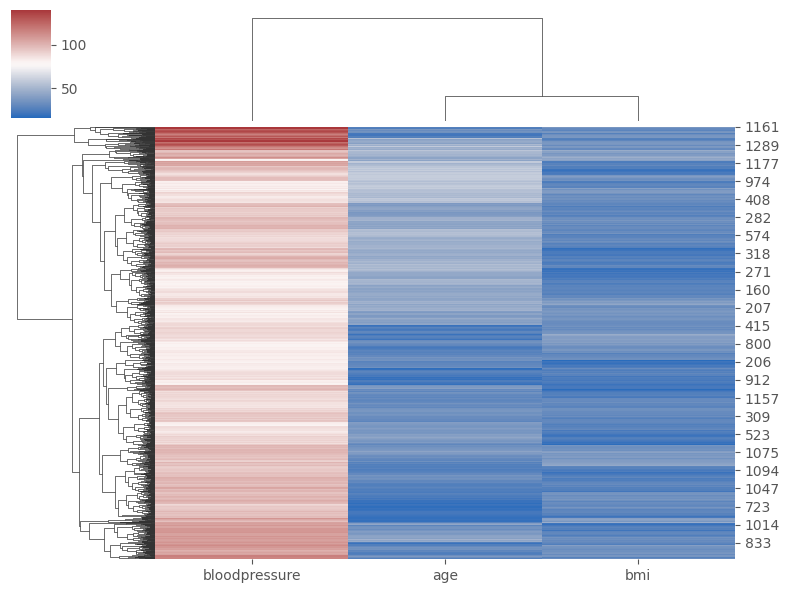

In [107]:
sns.clustermap(selectd_col,cmap='vlag',figsize=(8,6))
